### Exploratory Data Analysis: FBI Crime Database
*Zach Prenovost*

First off we are going to import our method chaining function to get our reduced, usuable data set:

In [45]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import importlib

# remove comment below and add comment 2 lines below if on windows
# sys.path.append(sys.path[0] + "\\..\\scripts")
sys.path.append(sys.path[0] + "/../scripts")

import project_functions as pf
importlib.reload(pf)

<module 'project_functions' from '/Users/zachprenovost/School/data301/FinalProject/Data301-Project/analysis/Zach/../scripts/project_functions.py'>

In [46]:
df = pf.load_and_process("../../Dataset.csv")

**So we've got our data. what now?**
lets start by looking at some of the attributes of our dataset.

In [47]:
print('shape: {}'.format(df.shape))
print('Columns: {}'.format(df.columns))

shape: (21069, 19)
Columns: Index(['Year', 'State', 'Division', 'County', 'Region',
       'Population_Description', 'Offense', 'Offender_Race',
       'Offender_Ethnicity', 'Offender_Age', 'Offender_Sex', 'Victim_Type',
       'Location', 'Weapon', 'Property_Type', 'Stolen_Value',
       'Recovered_Value', 'Recovered?', 'Recovery_Date'],
      dtype='object')


The `df.shape` function gives us the dimensions of our dataset. after using it we can see that there are 21,111 rows and 19 columns. 

the `df.columns` function gives us the names of all the columns included in the data set. 

Now lets look at what this dataset looks like: df.head will give us a look at the first five entries.

In [36]:
df.head()

,Year,State,Division,County,Region,Population_Description,Offense,Offender_Race,Offender_Ethnicity,Offender_Age,Offender_Sex,Victim_Type,Location,Weapon,Property_Type,Stolen_Value,Recovered_Value,Recovered?,Recovery_Date
87433,2013,Tennessee,East South Central,PUTNAM,South,"Cities from 25,000 thru 49,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Parking/Drop Lot/Garage,NaN,Clothes/ Furs,1765.0,0.0,N,NaN
82563,2013,Virginia,South Atlantic,HENRY,South,"Non-MSA counties from 25,000 thru 99,999",All Other Larceny,White,NaN,25.0,M,Individual,Service/Gas Station,NaN,Trailers,17500.0,17500.0,Y,03-Apr-13
28695,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,30.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
28696,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,31.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
60314,2013,South Carolina,South Atlantic,HORRY,South,"MSA counties 100,000 or over",All Other Larceny,NaN,NaN,NaN,NaN,Business,Specialty Store,NaN,Other,6500.0,0.0,N,NaN


# Next we want to gain an understanding of some of the different variables in the dataset

`df.nunique` will return the count of unique values associated with each collumn, already from this we can determine a number of things about our data set

In [37]:
df.nunique(axis=0)

Year                         7
State                       40
Division                     9
County                     674
Region                       4
Population_Description      17
Offense                     33
Offender_Race                6
Offender_Ethnicity           3
Offender_Age                73
Offender_Sex                 3
Victim_Type                  9
Location                    44
Weapon                      12
Property_Type               62
Stolen_Value              2698
Recovered_Value            457
Recovered?                   2
Recovery_Date             1235
dtype: int64

**from this we can gather:**
* we have data entries from 7 unique years 
* 40 different states
* there were over 33 different offenses listed 
* and over 12 different options for type of weapon used

We can come back to this later when trying to answer our reasearch questions. it will be useful.

Next lets use `.describe()` to look at the count, mean, standard deviation, min, and max for the numeric variables in our data set.

In [38]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Year,Offender_Age,Stolen_Value,Recovered_Value
count,21069.000000,8441.000000,21069.000000,20270.000000
mean,2016.780151,32.567231,18700.586786,6299.519339
std,1.966321,12.762746,51723.972002,30105.870148
min,2013.000000,0.000000,1001.000000,0.000000
25%,2015.000000,23.000000,2000.000000,0.000000
50%,2017.000000,31.000000,4500.000000,0.000000
75%,2019.000000,41.000000,15000.000000,1.000000
max,2019.000000,99.000000,999999.000000,800000.000000


Awesome! by using `df.describe` we gathered that the average value stolen was 39,663.86, the most stolen was 250,000,000 dollars. sheesh thats a lot. we also learned other things, like the average age of the offenders in our database

**now im going to look at some of the unique entries we talked about earlier, lets look at the crimes in particular!**

In [39]:
df.Offense.unique()

array(['Theft From Motor Vehicle', 'All Other Larceny', 'Embezzlement',
       'Weapon Law Violations', 'Motor Vehicle Theft',
       'False Pretenses/Swindle/Confidence Game',
       'Destruction/Damage/Vandalism of Property',
       'Burglary/Breaking & Entering',
       'Credit Card/Automated Teller Machine Fraud',
       'Theft of Motor Vehicle Parts or Accessories',
       'Theft From Building', 'Robbery', 'Rape',
       'Drug/Narcotic Violations', 'Impersonation',
       'Kidnapping/Abduction', 'Simple Assault',
       'Stolen Property Offenses', 'Wire Fraud', 'Counterfeiting/Forgery',
       'Murder and Nonnegligent Manslaughter', 'Shoplifting',
       'Intimidation', 'Extortion/Blackmail', 'Arson',
       'Drug Equipment Violations', 'Identity Theft',
       'Aggravated Assault', 'Sexual Assault With An Object',
       'Pocket-picking', 'Purse-snatching',
       'Pornography/Obscene Material',
       'Human Trafficking, Involuntary Servitude'], dtype=object)

we can use this function to look at all of our columns unique entries, lets look at weapons next. 

In [40]:
df.Weapon.unique()

array([nan, 'Firearm (Automatic)', 'Handgun', 'Handgun (Automatic)',
       'Firearm', 'None', 'Unknown', 'Rifle', 'Personal Weapons',
       'Blunt Object', 'Knife/Cutting Instrument', 'Other',
       'Motor Vehicle/Vessel'], dtype=object)

lets do this some more

In [41]:
print(df.State.unique())

print(df.Population_Description.unique())


['Tennessee' 'Virginia' 'Michigan' 'South Carolina' 'Florida'
 'West Virginia' 'Arkansas' 'Delaware' 'Mississippi' 'North Dakota'
 'Massachusetts' 'Texas' 'New Hampshire' 'Colorado' 'Oklahoma' 'Indiana'
 'Montana' 'Vermont' 'Maine' 'South Dakota' 'Ohio' 'Maryland'
 'Rhode Island' 'Georgia' 'Oregon' 'Nevada' 'Alaska' 'Kentucky'
 'Minnesota' 'New Mexico' 'New Jersey' 'Utah' 'Arizona' 'Washington'
 'Alabama' 'Idaho' 'North Carolina' 'Missouri' 'Nebraska' 'Hawaii']
['Cities from 25,000 thru 49,999'
 'Non-MSA counties from 25,000 thru 99,999'
 'Cities from 50,000 thru 99,999' 'MSA counties 100,000 or over'
 'MSA counties from 25,000 thru 99,999' 'Cities from 500,000 thru 999,999'
 'Cities from 2,500 thru 9,999' 'Cities from 10,000 thru 24,999'
 'Cities from 100,000 thru 249,999' 'MSA counties from 10,000 thru 24,999'
 'MSA counties under 10,000' 'Non-MSA counties from 10,000 thru 24,999'
 'Cities under 2,500' 'Non-MSA counties under 10,000'
 'Cities from 250,000 thru 499,999' 'Cities 1,000,

Next i am going to create some visuals to help us understand our data . 

the first plot i am going to create is a scatter plot. This will help us visualize where data points fall relative to each other. 

<AxesSubplot:xlabel='Year', ylabel='Stolen_Value'>

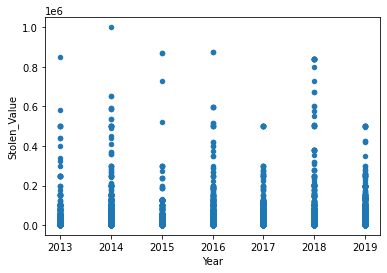

In [42]:
df.plot(kind = 'scatter', x = 'Year', y = 'Stolen_Value' )

after looking at the plot we can determine 2 things:
1. the vast majority of our data is clustered together. 
2. there are some outliers amongst the data.

lets get rid of those outliers so we have a more useful plot

<AxesSubplot:xlabel='Year', ylabel='Stolen_Value'>

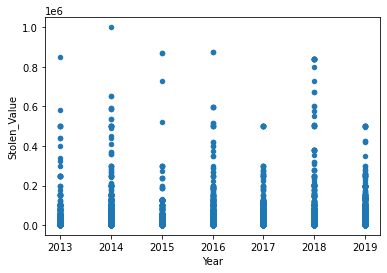

In [43]:
df2= df[df['Stolen_Value']<1000000]
df2.plot(kind = 'scatter', x = 'Year', y = 'Stolen_Value' )

now that we have set parameters on our data, speicifically capping the stolen value at 1,000,000 we can see the distribution across the 7 years much more clearly.

now we can look at where the most crime is occuring: here is a bar graph of crime by region:

<AxesSubplot:xlabel='Region', ylabel='count'>

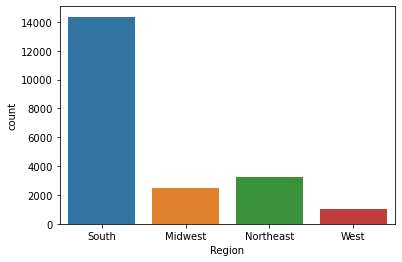

In [44]:
sns.countplot( data = df, x ='Region' )

from this graph we can determine the vast majority of crime is occuring in the south region of the united states. 